In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df= pd.read_excel("Online Retail.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.shape

(541909, 8)

In [7]:
df = df.drop_duplicates()
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df['CustomerID'] = df['CustomerID'].fillna(-1)
df = df.dropna(subset=['Description'])

In [9]:
df['TotalSpend'] = df['Quantity'] * df['UnitPrice']
df = df[['Quantity', 'UnitPrice', 'Country', 'TotalSpend']]
df['Country'] = df['Country'].astype('category').cat.codes

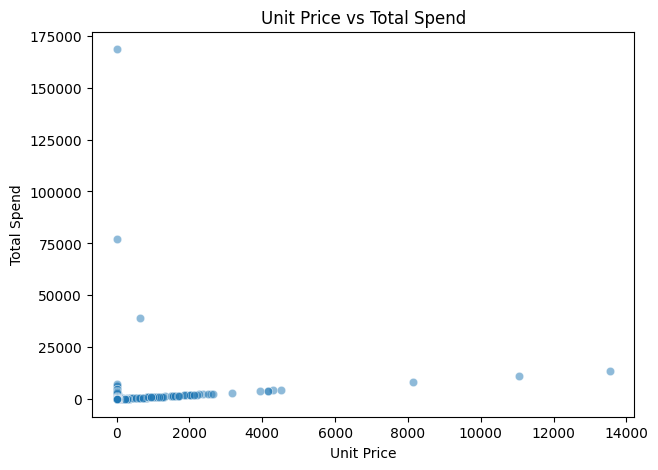

In [10]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='UnitPrice', y='TotalSpend', data=df, alpha=0.5)
plt.title('Unit Price vs Total Spend')
plt.xlabel('Unit Price')
plt.ylabel('Total Spend')
plt.show()


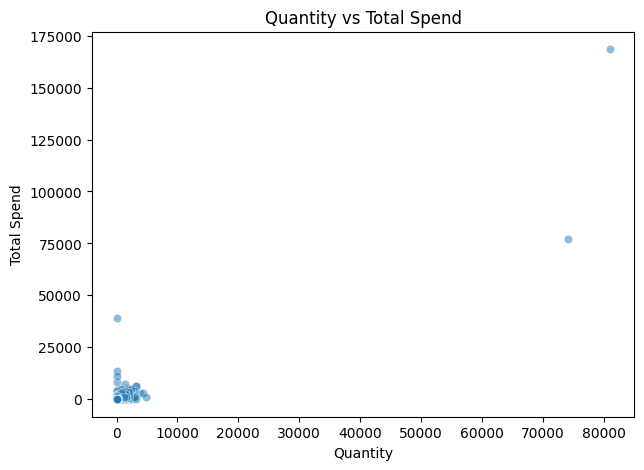

In [11]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Quantity', y='TotalSpend', data=df, alpha=0.5)
plt.title('Quantity vs Total Spend')
plt.xlabel('Quantity')
plt.ylabel('Total Spend')
plt.show()


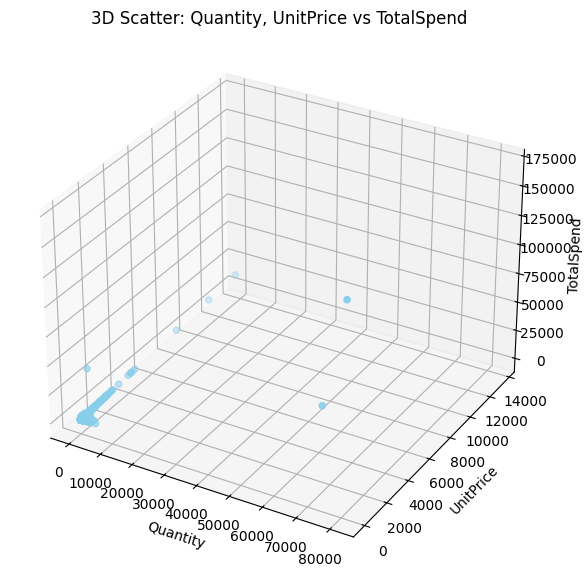

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Quantity'], df['UnitPrice'], df['TotalSpend'], c='skyblue', s=20)
ax.set_xlabel('Quantity')
ax.set_ylabel('UnitPrice')
ax.set_zlabel('TotalSpend')
plt.title('3D Scatter: Quantity, UnitPrice vs TotalSpend')
plt.show()


In [13]:
X = df[['Quantity', 'UnitPrice', 'Country']]
y = df['TotalSpend']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [16]:
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 1167.5561145804256
R² Score: 0.8262706363338151


In [18]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df = pred_df.reset_index(drop=True)
pred_df.head()  # Show top 10 rows

,Actual,Predicted
0,2.25,2.25
1,39.60,39.60
2,10.20,12.60
3,61.95,61.95
4,4.89,4.89


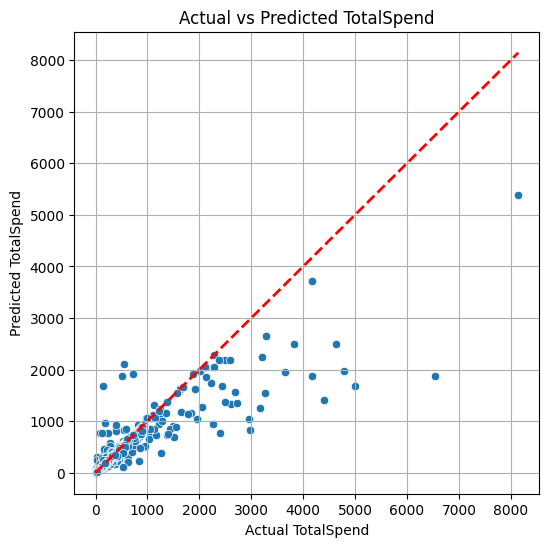

In [19]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=pred_df['Actual'], y=pred_df['Predicted'])
plt.plot([pred_df['Actual'].min(), pred_df['Actual'].max()],
         [pred_df['Actual'].min(), pred_df['Actual'].max()],
         color='red', lw=2, linestyle='--')
plt.xlabel('Actual TotalSpend')
plt.ylabel('Predicted TotalSpend')
plt.title('Actual vs Predicted TotalSpend')
plt.grid(True)
plt.show()

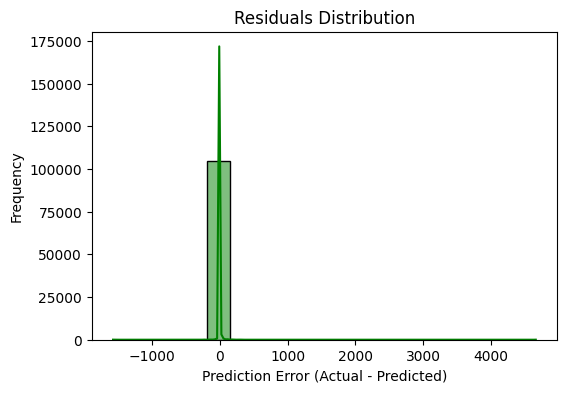

In [20]:
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, color='green')
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])

new_data = pd.DataFrame({
    'Quantity': [10],
    'UnitPrice': [4.589],
    'Country': [df['Country'].unique()[0]]  # Or any valid label
})

# Use same LabelEncoder as before
new_data['Country'] = le.transform(new_data['Country'])

# Predict
new_pred = knn.predict(new_data)
print(f"Predicted Total Spend: {new_pred[0]:.2f}")

Predicted Total Spend: 46.50


In [29]:
max_price = df['UnitPrice'].max()
min_price = df['UnitPrice'].min()

print(f"Maximum Unit Price: {max_price}")
print(f"Minimum Unit Price: {min_price}")

Maximum Unit Price: 13541.33
Minimum Unit Price: 0.001


In [34]:
avg_price = df['UnitPrice'].mean()
print(f"Average Unit Price: {avg_price}")

Average Unit Price: 3.9225725673394587
